In [2]:
from IPython.display import Image

# Precision Point Position

**¿Qué es ?**
>Emplea **datos de medición con fase no diferenciados**, es decir provenientes de un solo receptor de tipo geodésico, más **datos de corrección de los errores en los relojes de los satélites y órbitas precisas**, junto a un **esquema de modelamiento adicional de errores**, con la finalidad de obtener una solución con una exactitud a nivel de cm./dm.. En este caso los “puntos fijos” pasan a ser directamente los satélites.[1] El PPP se suele hacer con receptores de doble frecuencia y surgió por la disponibilidad de los productos (por ejemplo IGS)

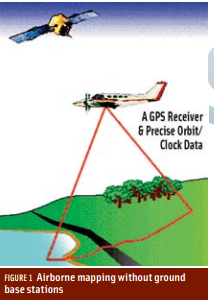

In [5]:
Image("PPP.png")

Se diferncia de RTK en que no utiliza datos de estaciones terrestres con ubicación conocida. La palabra "preciso" es para diferenciar de técnicas que usan simplemente observables de código suavisados por la fase.

Para máxima precisión **la fase-carrier debe ser  usada junto con el código**, de esta manera se puede llegar a presición de centímetros en posicionamiento estático y decímetros en el caso de un receptor que se encuentra en movimiento. Como se habló anterioirmente la fase además de traer más presición trae **ambiguedades y saltos de ciclo** que deben ser resueltas.

# Modelado de términos

Para el modelado de los términos de las ecuaciones de posición se tienen en cuenta:
- Órbitas y relojes precisos
- APC
-  Relatividad
- Atmósfera
- Deformación de la tierra


## Órbitas  y relojes precisos

Los archivos para orbitas y relojes precisos (FINAL de IGS) deben ser usados en vez de los enviados que se usan en SPP (rapid,ultrarapid, etc). Fuentes: <a href ="https://igscb.jpl.nasa.gov/components/prods.html">Productos de IGS</a>,  <a href ="http://www.igs.org/products">Productos de IGS (nuevo sitio)</a> Existen otras fuentes que también proveen estos datos, algunas privadas.

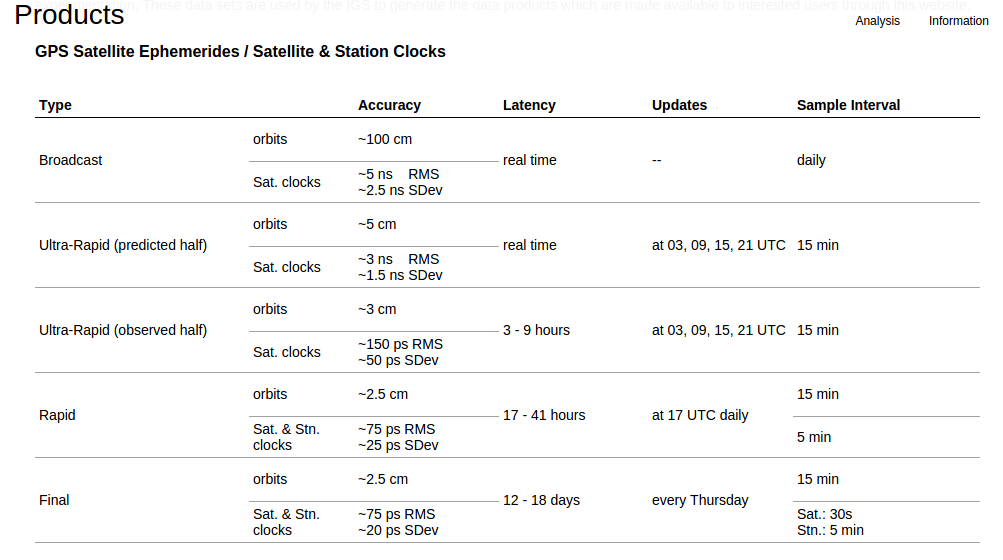

In [7]:
Image("products.png")

**Órbitas**

El polinomio 
Las coordenadas de satélites entre épocas se interpolan con polinomios grado 10, suficiente para obtener precision de centímetros, con 15 minutos de datos. Los satélites en eclipse se descartan.

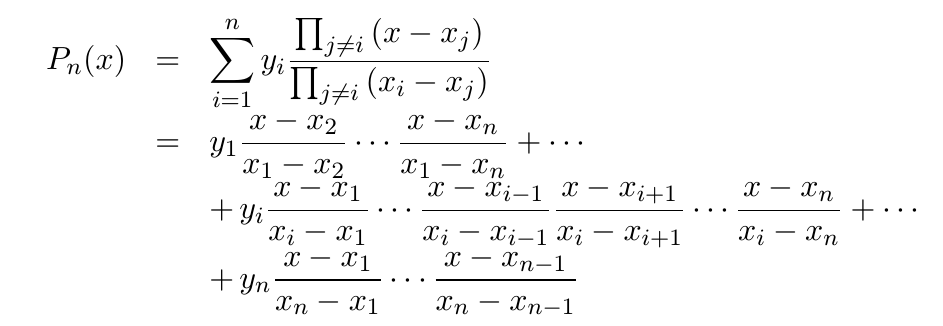

In [6]:
Image("poliinterpol.png")

### APC Satélite

Las órbitas son referidas al centro de masa del satélite, de modo que hay que tener en cuenta el vector offset de centro de fase.

Si  $\Delta_{APC}$ es el offset en el sistema centrado en el satélite (i,j,k). Las coordenadas del APC de sat en ECEF están dadas por:

$r^{sat_{APC}} = r^{sat_{MC}} + \textbf {R}.\Delta_{APC} $

Donde $\textbf {R} = [\hat{i},\hat{j},\hat{k}]$



### Relojes

Los relojes de satélites **no deben ser interpolados si su tasa de muestreo es de 30 segundos o menos**, sólo las épocas con relojes disponibles deben ser usadas. De lo contrario se puede usar polinomio de primer grado.

### Efectos de la Relatividad 


Al efecto shapiro sólo se tiene en cuenta en aplicaciones de muy alta precisión pues solo afecta en ~2 cm la posición, debido a la curvatura espacio-tiempo producida por el campo gravitacional el rango euclidiano se corrige, este efecto se modela como un retraso:

$\Delta \rho_{rel}= \frac{2 \mu}{c^2} ln \frac{r^{sat}+r_{rcv}+r^{sat}_{rcv}}{r^{sat}+r_{rcv}-r^{sat}_{rcv}}$

$r^{sat}, r_{rcv}$ son distancias geocéntricas.

$r^{sat}_{rcv}$ es la distancia entre receptor y satélite.


**pintar correcciones de rango**

### Efectos atmosféricos

**Ionosfera**

PPP se hace en receptores de doble frecuencia por lo tanto las combinaciones libres del efecto dela ionosfera se usan pues es uno de los efectos más difíciles de modelar, además los TGD (Total Group Delay) de los códigos también se cancelan.

<center>$\Phi_{iono_free} = \frac{f_1^2\Phi_1 - f_2^2\Phi_2}{f_1^2-f_2^2}$</center>

<center>$R_{iono_free} = \frac{f_1^2R_1 - f_2^2R_2}{f_1^2-f_2^2}$</center>

**Troposfera**

La refración debe ser modelada y uno de los modelos quese usan es el modelo de Niell, el cual consideradiferentes factores de oblicuidad para los componentes húmedos y secos.

$Tr(E) = Tr_{z,dry}.M_{dry}(E)+Tr_{z,wet}.M_{wet}(E)$

### Wind-up

Afecta solo a las medidas de fase debido a la naturaleza electromagnética de las ondas polarizadas circularmente. Depende de la orientación relativa de las antenas.

Si el receptor es fijo el wind-up es debido al movimiento del satéliteya que los paneles deben apuntar hacia el sol mientras la antena sigue apuntando al centro de la tierra, causando una variación de fase que el receptor entiende como una variación de rango.

### Deformación de la Tierra

El movimiento de la corteza de la tierra(mareas sólidas) varía la ubicación del receptor, esto es debido a la fuerza de atracción gravitacional de los cuerpos cercanos (sol, luna)

# Modelo linealizado para PPP

$R_c^j = \rho^j +c(\delta t-\delta t^j) + Tr^j + M_c^j + \varepsilon_c^j $

$\Phi_c^j = \rho^j +c(\delta t-\delta t^j) + Tr^j + \lambda_N w^j+B_C^j+ m_C^j + \epsilon_c^j $



$y = Gx$

Donde y son los residuales de fase y código de la combinacion libre de retraso de ionosfera. $\rho$ se refiere al APC en esta combinación. $\delta t^j$ incluye la correccio relativista debido a la eccentricidad de la órbita

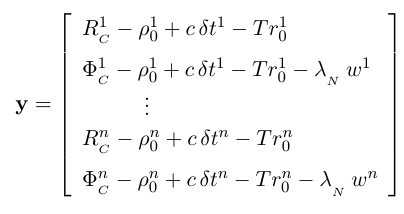

In [5]:
Image("yPPP.png")

$Tr_0$ es el valor nominal de la corrección troposférica.

### Matriz de geometría

El componente húmero del modelo troposférico $M_{wet}$ es un elemento de la matriz mientras que $\Delta Tr_{z,wet}$ es uno de los parámetros a ser estimados, la multiplicación de ambos da la desviación del retraso nominal.

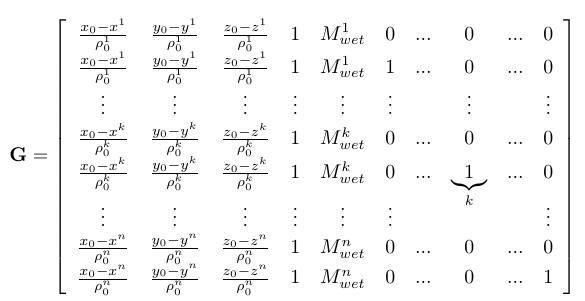

In [6]:
Image("GPPP.png")

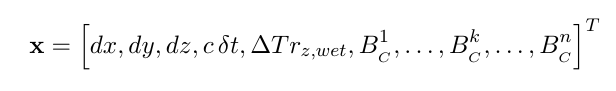

In [7]:
Image("xPPP.png")

# Solución

 El sistema $y = Gx$ puede solucionarse mediante filtros de Kalman. Se consideran los bias de fase $B_i^c$ como constantes en los arcos y los saltos de ciclo  como ruido blanco. 
 
 
## Ventajas y desventajas de PPP

- Depende de una red global que computa correcciones, a diferencia de DGPS no depende de estaciones cercanas que puden tener fallos.
- Su posición es global y no en referncia a otra estación conocida.

- Receptores de doble frecuencia.

- El largo tiempo de inicialización es una desventaja.

- La precisión de decímetros en movimiento y centímetros para el caso estático.

- El PPP requiere de una gran cantidad de correcciones para alcanzar las exactitudes que ofrece

# Input para PPP

- Archivos de órbitas  y relojes "Final IGS" .sp3
- Datos de observación Doble Frecuencia. RINEX
- Archivo ANTEX para computar correcciones de APC

In [8]:
import gpstk

In [56]:
#%cat igs18270.sp3

In [59]:
#http://www.gpstk.org/pythondoc/newstuff.html
#ssssdddf.yyt bogt0110.15o  estacion bogt día: 011 año 2015 gpsweek 1827 #ojo ha varios!
header, data = gpstk.readSP3("igs18270.sp3")
print "Agencia: ",header.agency, "\nCoordenadas: ",header.coordSystem , "\nNumero de epocas: ",header.numberOfEpochs, "\nSistema (tiempo): ",header.timeSystem,"\nIntervalos (min): ", header.epochInterval/60  # 15 minutos

Agencia:   IGS 
Coordenadas:  IGb08 
Numero de epocas:  96 
Sistema (tiempo):  GPS 
Intervalos (min):  15.0


In [64]:
for datum in data:
    print datum
    """print datum.sat
    print datum.x 
    print datum.RecType
    """
    break

P G04 2015/01/11  0:00:00.000 = 1827/     0.000 X= -15685.423354 Y= -17618.353318 Z= -12777.466599 C=     -5.477739 sX= 8 sY= 9 sZ= 9 sC=138 - - - -



In [13]:
orbits[0.ipynb_checkpoints/

<gpstk.gpstk.Rinex3ClockHeader; proxy of <Swig Object of type 'gpstk::Rinex3ClockHeader *' at 0x7f31fb9d8e10> >

**Más links**

[1] http://cafegeodesico.blogspot.com.co/2013/07/el-posicionamiento-puntual-preciso-ppp.html --> leer :)

http://www.igs.org/analysis/gps-ppp

http://kb.igs.org/hc/en-us/articles/201096516-IGS-Formats --> formatos

http://kb.igs.org/hc/en-us/articles/202054393-IGS-FTP-Sites --> nuevo "mapa"

ftp://cddis.gsfc.nasa.gov/gps/products/1172/ Semana ejemplo

http://www.navipedia.net/index.php/Antenna_Phase_Centre  APC

https://igscb.jpl.nasa.gov/igscb/station/general/igs_01.txt more APC

igu11720_00.sp3.Z --> Orbitas y relojes precisos
igu11720_00.erp.Z --> Parámetros de rotación de la tierra

http://www.insidegnss.com/auto/NovDec06GNSSSolutions.pdf
https://github.com/aewallin/ppp-tools repo que usa glab :(
http://gage.upc.edu/drupal6/gLAB


http://www.gps-forums.com/threads/interpolation-of-the-gps-satellite-positions-from-the-sp3-files.34188/  interpolacion de orbitas

https://www.ngs.noaa.gov/CORS/Gpscal.shtml calendario de semanas GPS cada semana tiene un numero.

http://gage.es/drupal6/forum/analysis-propagation-effects-gnss-observables-based-laboratory-exercises ejercicios gage usando glab
 
https://github.com/rramosp/20152.ai.uis/blob/master/Notas%2003B%20-%20Filtros%20de%20Kalman.ipynb kalman
ftp://igscb.jpl.nasa.gov/igscb/station/general/igs_01.pcv pcv info antenas

ftp://igscb.jpl.nasa.gov/igscb/station/general/igs_01.atx antex igs :|
ftp://igscb.jpl.nasa.gov/igscb/station/general/antex14.txt sobre antex

ftp://igscb.jpl.nasa.gov/igscb/station/general/pcv_archive/ aqui hay más

**Recptor: APC y ARP**

APC Antenna phase center:  Centro de fase de la antena del receptor, esta definida como la fuente aparente de radiación. Su ubicación depende de la frecuencia, no es constante, no está necesariamente en el centro geométrico, de modo que un punto fijo en la base de la antena es usado como referencia. (ARP: Anthenna reference point).

El APC depende de la dirección de la señal de radio que llega y por eso es dependiente del angulo (elevación y azimuth), los fabricantes proveen informacion relativa al ARP pero IGS computa correcciones en archivos PVC y ANTEX.


#Image("antena.png")


For official IGS models the following naming convention is used:

   mmmmm_wwww.atx
   |     |
   |     +------- wwww: GPS week of the last file change
   |
   +------------ mmmmm: 5-character model name (will only be changed, if
                        existing values are changed)